# 全球疫情数据获取与分析

## 一、全球疫情数据的获取途径

### 1.1  GitHub获取

> 从GitHub上获取是最简单，最快捷的获取数据方法。这里的数据主要从[【https://github.com/TuTomasz/Covid19-Dataset/】](https://github.com/TuTomasz/Covid19-Dataset/)上面获取。获取步骤：1打开网址，2下载数据。

![](./img/GitHub获取数据.png)


<img src = "./img/GitHub获取的数据.png" width =50% >

### 1.2 Python爬虫获取

#### 1.2.1 从GitHub中爬取数据

>类似于从GitHub中获取数据，这里只是通过Python实现。这种方法远没有直接从网站下载来的快，不建议使用，还可能因连接失败而发生错误。

![](./img/GitHub爬取数据.png)

```python
import json
import urllib3

http = urllib3.PoolManager()
response = http.request('GET', "http://tiny.cc/Covid-19-global")
data = json.loads(response.data)

print(data)
```



#### 1.2.2 从各个网站上爬取数据

> 疫情数据的网站介绍：
> 1. [【网易】](https://wp.m.163.com/163/page/news/virus_report/index.html?_nw_=1&_anw_=1)
> 2. [【头条】](https://i.snssdk.com/feoffline/hot_list/template/hot_list/forum_share.html?forum_id=1656388947394568&is_web_refresh=1)
> 3. [【腾讯】](https://news.qq.com/zt2020/page/feiyan.htm#/area?pool=bj)
> 4. [【百度】](https://voice.baidu.com/act/newpneumonia/newpneumonia)
> 5. [【丁香园】](https://ncov.dxy.cn/ncovh5/view/pneumonia)
> 6. [【搜狗】](http://sa.sogou.com/new-weball/page/sgs/epidemic)

> 理论上应该都能从以上公布数据的网站上获取到疫情数据，这里以百度数据为例，从中爬取全球疫情数据：

-  爬取目标网址：https://voice.baidu.com/act/newpneumonia/newpneumonia

In [51]:
# 爬取当前时间全球疫情数据


# 导入requests库
import requests
url = "https://voice.baidu.com/act/newpneumonia/newpneumonia"
response = requests.get(url)
# 查看正确响应的结果，并与网页源代码比较一下，是否相同
result = response.text

# 导入xpath库，如未安装在cmd里面输入pip install xpath即可
from lxml import etree # 将数据转化为树形态
# 生成HTML对象
html = etree.HTML(result)
result = html.xpath('//script[@type="application/json"]/text()')
result = result[0]

# 导入Json库，此库无需安装
import json
result = json.loads(result)
result = result["component"]

# 获取国外当前数据
result = result[0]
a = result["mapLastUpdatedTime"]
print("爬取数据得到当前时间是：",a)
result = result["globalList"]

# 导入模块
import openpyxl
# 创建工作簿
wb = openpyxl.Workbook()

for each in result:
    title = each["area"] # 获取各州名
    ws = wb.create_sheet(title) # 根据名称创建多个工作表
    ws.append(["国家","累计确诊","死亡","治愈"]) # 写入表头至新建的表
    for country in each["subList"]: # 可以从原始数据中看到各个国家的数据在"subList"键中
        list_name = [country["country"],country["confirmed"],country["died"],country["crued"]]
        for i in list_name:
            if i == "":
                i = "0"
        ws.append(list_name)
# 保存至excel中
wb.save(f'./{a.split(" ")[0]}.xlsx') 
print("- "*25)
print("执行结束")

爬取数据得到当前时间是： 2020.07.01 23:39
- - - - - - - - - - - - - - - - - - - - - - - - - 
执行结束


## 二、确诊病例数据可视化分析

> 数据来源：据前面介绍的GitHub上获取的数据。

### 2.1  疫情数据预处理

In [52]:
import pandas as pd
df = pd.read_csv(r"Covid19-Dataset-master\Data\raw\Cases_raw.csv")
df

Province/State         Country/Region        Lat       Long  1/22/20  \
0              NaN            Afghanistan  33.000000  65.000000        0   
1              NaN                Albania  41.153300  20.168300        0   
2              NaN                Algeria  28.033900   1.659600        0   
3              NaN                Andorra  42.506300   1.521800        0   
4              NaN                 Angola -11.202700  17.873900        0   
..             ...                    ...        ...        ...      ...   
261            NaN  Sao Tome and Principe   0.186360   6.613081        0   
262            NaN                  Yemen  15.552727  48.516388        0   
263            NaN                Comoros -11.645500  43.333300        0   
264            NaN             Tajikistan  38.861034  71.276093        0   
265            NaN                Lesotho -29.609988  28.233608        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  6/13/20  6/14/20  \
0          0        0        0        0        0  ...    24102    24766   
1          0        0        0        0        0  ...     1464     1521   
2          0        0        0        0        0  ...    10810    10919   
3          0        0        0        0        0  ...      853      853   
4          0        0        0        0        0  ...      138      140   
..       ...      ...      ...      ...      ...  ...      ...      ...   
261        0        0        0        0        0  ...      659      661   
262        0        0        0        0        0  ...      705      728   
263        0        0        0        0        0  ...      176      176   
264        0        0        0        0        0  ...     4971     5035   
265        0        0        0        0        0  ...        4        4   

     6/15/20  6/16/20  6/17/20  6/18/20  6/19/20  6/20/20  6/21/20  6/22/20  
0      25527    26310    26874    27532    27878    28424    28833    29157  
1       1590     1672     1722     1788     1838     1891     1962     1995  
2      11031    11147    11268    11385    11504    11631    11771    11920  
3        853      854      854      855      855      855      855      855  
4        142      148      155      166      172      176      183      186  
..       ...      ...      ...      ...      ...      ...      ...      ...  
261      662      671      683      688      693      698      698      702  
262      844      885      902      909      919      922      941      967  
263      176      197      197      210      210      247      247      247  
264     5097     5160     5221     5279     5338     5399     5457     5513  
265        4        4        4        4        4        4        4       12  

[266 rows x 157 columns]

In [53]:
# 查看天数
len(df.columns)-4

153

In [54]:
# 查看共有多少国家的数据
len(df["Country/Region"].unique())

188

> 通过Pandas打开数据，这上面记录的数据是从2020年1月22日到2020年6月22日的数据，共计153天的数据,共188个国家的数据。

In [55]:
df_sum = df.copy()
df_sum.drop(["Province/State","Lat","Long"],axis=1,inplace=True)
df_sum = df_sum.groupby(by="Country/Region",as_index=True).sum()
df_sum.to_csv("data.csv")
df_sum

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
Country/Region                                                             
Afghanistan               0        0        0        0        0        0   
Albania                   0        0        0        0        0        0   
Algeria                   0        0        0        0        0        0   
Andorra                   0        0        0        0        0        0   
Angola                    0        0        0        0        0        0   
...                     ...      ...      ...      ...      ...      ...   
West Bank and Gaza        0        0        0        0        0        0   
Western Sahara            0        0        0        0        0        0   
Yemen                     0        0        0        0        0        0   
Zambia                    0        0        0        0        0        0   
Zimbabwe                  0        0        0        0        0        0   

                    1/28/20  1/29/20  1/30/20  1/31/20  ...  6/13/20  6/14/20  \
Country/Region                                          ...                     
Afghanistan               0        0        0        0  ...    24102    24766   
Albania                   0        0        0        0  ...     1464     1521   
Algeria                   0        0        0        0  ...    10810    10919   
Andorra                   0        0        0        0  ...      853      853   
Angola                    0        0        0        0  ...      138      140   
...                     ...      ...      ...      ...  ...      ...      ...   
West Bank and Gaza        0        0        0        0  ...      489      492   
Western Sahara            0        0        0        0  ...        9        9   
Yemen                     0        0        0        0  ...      705      728   
Zambia                    0        0        0        0  ...     1357     1358   
Zimbabwe                  0        0        0        0  ...      356      383   

                    6/15/20  6/16/20  6/17/20  6/18/20  6/19/20  6/20/20  \
Country/Region                                                             
Afghanistan           25527    26310    26874    27532    27878    28424   
Albania                1590     1672     1722     1788     1838     1891   
Algeria               11031    11147    11268    11385    11504    11631   
Andorra                 853      854      854      855      855      855   
Angola                  142      148      155      166      172      176   
...                     ...      ...      ...      ...      ...      ...   
West Bank and Gaza      505      514      555      600      675      784   
Western Sahara            9        9        9        9        9        9   
Yemen                   844      885      902      909      919      922   
Zambia                 1382     1405     1412     1416     1430     1430   
Zimbabwe                387      391      401      463      479      479   

                    6/21/20  6/22/20  
Country/Region                        
Afghanistan           28833    29157  
Albania                1962     1995  
Algeria               11771    11920  
Andorra                 855      855  
Angola                  183      186  
...                     ...      ...  
West Bank and Gaza      833     1001  
Western Sahara            9       10  
Yemen                   941      967  
Zambia                 1430     1430  
Zimbabwe                489      512  

[188 rows x 153 columns]

In [56]:
values = df_sum["6/22/20"].values.tolist() # 用于后面Pyecharts绘制地图

In [57]:
# 按照最后一天的数据从高到低进行排序
df_sum.sort_values("6/22/20",ascending=False,inplace=True)
df_sum

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
Country/Region                                                           
US                      1        1        2        2        5        5   
Brazil                  0        0        0        0        0        0   
Russia                  0        0        0        0        0        0   
India                   0        0        0        0        0        0   
United Kingdom          0        0        0        0        0        0   
...                   ...      ...      ...      ...      ...      ...   
Holy See                0        0        0        0        0        0   
Seychelles              0        0        0        0        0        0   
Western Sahara          0        0        0        0        0        0   
MS Zaandam              0        0        0        0        0        0   
Papua New Guinea        0        0        0        0        0        0   

                  1/28/20  1/29/20  1/30/20  1/31/20  ...  6/13/20  6/14/20  \
Country/Region                                        ...                     
US                      5        5        5        7  ...  2074526  2094058   
Brazil                  0        0        0        0  ...   850514   867624   
Russia                  0        0        0        2  ...   519458   528267   
India                   0        0        1        1  ...   320922   332424   
United Kingdom          0        0        0        2  ...   295828   297342   
...                   ...      ...      ...      ...  ...      ...      ...   
Holy See                0        0        0        0  ...       12       12   
Seychelles              0        0        0        0  ...       11       11   
Western Sahara          0        0        0        0  ...        9        9   
MS Zaandam              0        0        0        0  ...        9        9   
Papua New Guinea        0        0        0        0  ...        8        8   

                  6/15/20  6/16/20  6/17/20  6/18/20  6/19/20  6/20/20  \
Country/Region                                                           
US                2114026  2137731  2163290  2191052  2222579  2255119   
Brazil             888271   923189   955377   978142  1032913  1067579   
Russia             536484   544725   552549   560321   568292   576162   
India              343091   354065   366946   380532   395048   410451   
United Kingdom     298315   299600   300717   301935   303285   304580   
...                   ...      ...      ...      ...      ...      ...   
Holy See               12       12       12       12       12       12   
Seychelles             11       11       11       11       11       11   
Western Sahara          9        9        9        9        9        9   
MS Zaandam              9        9        9        9        9        9   
Papua New Guinea        8        8        8        8        8        8   

                  6/21/20  6/22/20  
Country/Region                      
US                2281290  2312302  
Brazil            1083341  1106470  
Russia             583879   591465  
India              425282   440215  
United Kingdom     305803   306761  
...                   ...      ...  
Holy See               12       12  
Seychelles             11       11  
Western Sahara          9       10  
MS Zaandam              9        9  
Papua New Guinea        8        9  

[188 rows x 153 columns]

In [58]:
# 将上表格数据装置，便于数据可视化
df = df_sum.T
df

Country/Region       US   Brazil  Russia   India  United Kingdom    Peru  \
1/22/20               1        0       0       0               0       0   
1/23/20               1        0       0       0               0       0   
1/24/20               2        0       0       0               0       0   
1/25/20               2        0       0       0               0       0   
1/26/20               5        0       0       0               0       0   
...                 ...      ...     ...     ...             ...     ...   
6/18/20         2191052   978142  560321  380532          301935  244388   
6/19/20         2222579  1032913  568292  395048          303285  244388   
6/20/20         2255119  1067579  576162  410451          304580  251338   
6/21/20         2281290  1083341  583879  425282          305803  251338   
6/22/20         2312302  1106470  591465  440215          306761  257447   

Country/Region   Chile   Spain   Italy    Iran  ...  Laos  Dominica  Fiji  \
1/22/20              0       0       0       0  ...     0         0     0   
1/23/20              0       0       0       0  ...     0         0     0   
1/24/20              0       0       0       0  ...     0         0     0   
1/25/20              0       0       0       0  ...     0         0     0   
1/26/20              0       0       0       0  ...     0         0     0   
...                ...     ...     ...     ...  ...   ...       ...   ...   
6/18/20         225103  245268  238159  197647  ...    19        18    18   
6/19/20         231393  245575  238011  200262  ...    19        18    18   
6/20/20         236748  245938  238275  202584  ...    19        18    18   
6/21/20         242355  246272  238499  204952  ...    19        18    18   
6/22/20         246963  246504  238720  207525  ...    19        18    18   

Country/Region  Saint Kitts and Nevis  Lesotho  Holy See  Seychelles  \
1/22/20                             0        0         0           0   
1/23/20                             0        0         0           0   
1/24/20                             0        0         0           0   
1/25/20                             0        0         0           0   
1/26/20                             0        0         0           0   
...                               ...      ...       ...         ...   
6/18/20                            15        4        12          11   
6/19/20                            15        4        12          11   
6/20/20                            15        4        12          11   
6/21/20                            15        4        12          11   
6/22/20                            15       12        12          11   

Country/Region  Western Sahara  MS Zaandam  Papua New Guinea  
1/22/20                      0           0                 0  
1/23/20                      0           0                 0  
1/24/20                      0           0                 0  
1/25/20                      0           0                 0  
1/26/20                      0           0                 0  
...                        ...         ...               ...  
6/18/20                      9           9                 8  
6/19/20                      9           9                 8  
6/20/20                      9           9                 8  
6/21/20                      9           9                 8  
6/22/20                     10           9                 9  

[153 rows x 188 columns]

### 2.2  数据可视化

In [59]:
# 只需去掉本单元格注释，再按shift+回车 运行本单元格，就可以让jupyter notebook宽屏显示
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))

In [60]:
# 忽略烦人的红色提示
import warnings
warnings.filterwarnings("ignore")


# 导入Python的数据处理库pandas，相当于python里的excel
import pandas as pd
import numpy as np

# 导入python绘图matplotlib
import matplotlib.pyplot as plt
# 设置绘图的风格
import  matplotlib.style as psl

# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

# 设置绘图大小
plt.style.use({'figure.figsize':(40,15)})
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

#### 2.2.1 matplotlib绘制折线图

> matplotlib绘制折线图（由于数据较多，因此只绘制TOP10的数据）

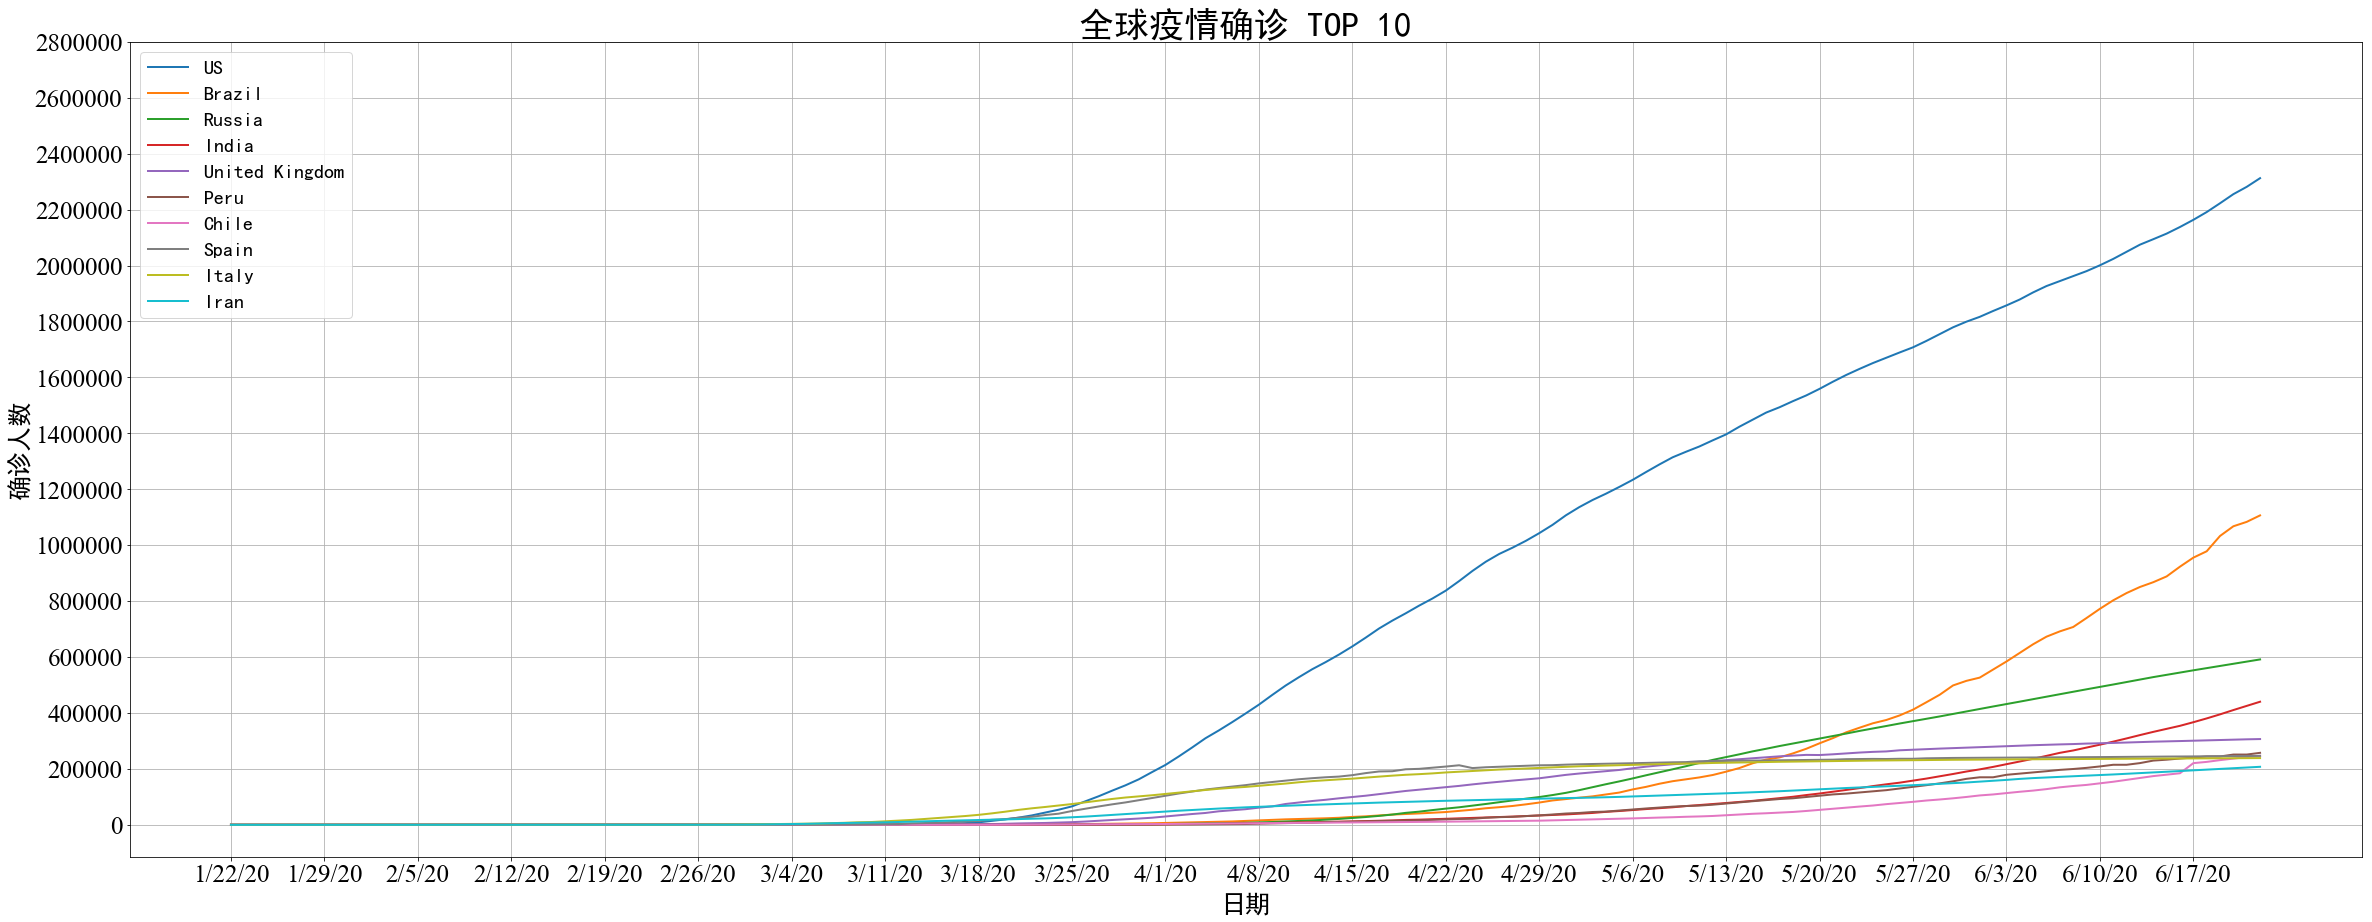

In [61]:
# 获取前十国家的名称
a = df.columns[:10] 
for i in a:
    plt.plot(df[i],label =i,linewidth=2)

plt.legend(fontsize=20)
plt.grid()
plt.yticks(np.arange(0,3000000,200000),fontproperties = 'Times New Roman', size = 25)
plt.xticks(np.arange(0,len(df),7),fontproperties = 'Times New Roman', size = 25)
plt.xlabel('日期',size = 25)
plt.ylabel('确诊人数',size = 25)
plt.title('全球疫情确诊 TOP 10', size = 35)
plt.show()

#### 2.2.2  Pyecharts绘制数据交互图

In [62]:
from pyecharts.charts import Line
from pyecharts import options as opts
# 内置主题类型可查看 pyecharts.globals.ThemeType
from pyecharts.globals import ThemeType

line = (
    Line(init_opts=opts.InitOpts(width="1600px",theme=ThemeType.LIGHT))
    .add_xaxis(df.index.tolist())
    .add_yaxis("美国", df["US"].tolist())
    .add_yaxis("巴西", df["Brazil"].tolist())
    .add_yaxis("智利", df["Chile"].tolist())
    .add_yaxis("西班牙", df["Spain"].tolist())
    .add_yaxis("意大利", df["Italy"].tolist())
    .add_yaxis("伊朗", df["Iran"].tolist())
    .add_yaxis("秘鲁", df["Peru"].tolist())
    .add_yaxis("英国", df["United Kingdom"].tolist())
    .add_yaxis("俄罗斯", df["Russia"].tolist())
    .add_yaxis("印度", df["India"].tolist())
    .set_global_opts(title_opts=opts.TitleOpts(title="全球疫情确诊TOP10", subtitle="截至2020.6.22"),
                    datazoom_opts=opts.DataZoomOpts(is_show=True,is_realtime=False))
)
line.render_notebook()

In [63]:
from pyecharts.charts import Bar
from pyecharts import options as opts
# 内置主题类型可查看 pyecharts.globals.ThemeType
from pyecharts.globals import ThemeType

line = (
    Bar(init_opts=opts.InitOpts(width="1600px",theme=ThemeType.LIGHT))
    .add_xaxis(df.index.tolist())
    .add_yaxis("美国", df["US"].tolist())
    .add_yaxis("巴西", df["Brazil"].tolist())
    .add_yaxis("智利", df["Chile"].tolist())
    .add_yaxis("西班牙", df["Spain"].tolist())
    .add_yaxis("意大利", df["Italy"].tolist())
    .add_yaxis("伊朗", df["Iran"].tolist())
    .add_yaxis("秘鲁", df["Peru"].tolist())
    .add_yaxis("英国", df["United Kingdom"].tolist())
    .add_yaxis("俄罗斯", df["Russia"].tolist())
    .add_yaxis("印度", df["India"].tolist())
    .set_global_opts(
                    title_opts=opts.TitleOpts(title="全球疫情确诊TOP10", subtitle="截止至2020.6.22"),
                    datazoom_opts=opts.DataZoomOpts(is_show=True,is_realtime=False)
                    )
        )
line.render_notebook()

In [64]:
from pyecharts.charts import EffectScatter
from pyecharts import options as opts
# 内置主题类型可查看 pyecharts.globals.ThemeType
from pyecharts.globals import ThemeType

scatter = (EffectScatter(init_opts=opts.InitOpts(width="1600px",theme=ThemeType.LIGHT))
            .add_xaxis(df.index.tolist())
            .add_yaxis("美国", df["US"].tolist())
            .set_global_opts(
                            title_opts=opts.TitleOpts(title="美国疫情确诊", subtitle="截止至2020.6.22"),
                            datazoom_opts=opts.DataZoomOpts(is_show=True,is_realtime=False)
                            )
          )
scatter.render_notebook()

> 疫情地图的绘制

In [65]:
E_C = {
  "Somalia": "索马里",
  "Liechtenstein": "列支敦士登",
  "Morocco": "摩洛哥",
  "W. Sahara": "西撒哈拉",
  "Serbia": "塞尔维亚",
  "Afghanistan": "阿富汗",
  "Angola": "安哥拉",
  "Albania": "阿尔巴尼亚",
  "Andorra": "安道尔共和国",
  "United Arab Emirates": "阿拉伯联合酋长国",
  "Argentina": "阿根廷",
  "Armenia": "亚美尼亚",
  "Australia": "澳大利亚",
  "Austria": "奥地利",
  "Azerbaijan": "阿塞拜疆",
  "Burundi": "布隆迪",
  "Belgium": "比利时",
  "Benin": "贝宁",
  "Burkina Faso": "布基纳法索",
  "Bangladesh": "孟加拉国",
  "Bulgaria": "保加利亚",
  "Bahrain": "巴林",
  "Bahamas": "巴哈马",
  "Bosnia and Herz.": "波斯尼亚和黑塞哥维那",
  "Belarus": "白俄罗斯",
  "Belize": "伯利兹",
  "Bermuda": "百慕大",
  "Bolivia": "玻利维亚",
  "Brazil": "巴西",
  "Barbados": "巴巴多斯",
  "Brunei": "文莱",
  "Bhutan": "不丹",
  "Botswana": "博茨瓦纳",
  "Central African Rep.": "中非",
  "Canada": "加拿大",
  "Switzerland": "瑞士",
  "Chile": "智利",
  "China": "中国",
  "Côte d'Ivoire": "科特迪瓦",
  "Cameroon": "喀麦隆",
  "Dem. Rep. Congo": "刚果民主共和国",
  "Congo": "刚果",
  "Colombia": "哥伦比亚",
  "Cape Verde": "佛得角",
  "Costa Rica": "哥斯达黎加",
  "Cuba": "古巴",
  "N. Cyprus": "北塞浦路斯",
  "Cyprus": "塞浦路斯",
  "Czech Rep.": "捷克",
  "Germany": "德国",
  "Djibouti": "吉布提",
  "Denmark": "丹麦",
  "Dominican Rep.": "多米尼加",
  "Algeria": "阿尔及利亚",
  "Ecuador": "厄瓜多尔",
  "Egypt": "埃及",
  "Eritrea": "厄立特里亚",
  "Spain": "西班牙",
  "Estonia": "爱沙尼亚",
  "Ethiopia": "埃塞俄比亚",
  "Finland": "芬兰",
  "Fiji": "斐济",
  "France": "法国",
  "Gabon": "加蓬",
  "United Kingdom": "英国",
  "Georgia": "格鲁吉亚",
  "Ghana": "加纳",
  "Guinea": "几内亚",
  "Gambia": "冈比亚",
  "Guinea-Bissau": "几内亚比绍",
  "Eq. Guinea": "赤道几内亚",
  "Greece": "希腊",
  "Grenada": "格林纳达",
  "Greenland": "格陵兰",
  "Guatemala": "危地马拉",
  "Guam": "关岛",
  "Guyana": "圭亚那",
  "Honduras": "洪都拉斯",
  "Croatia": "克罗地亚",
  "Haiti": "海地",
  "Hungary": "匈牙利",
  "Indonesia": "印度尼西亚",
  "India": "印度",
  "Br. Indian Ocean Ter.": "英属印度洋领土",
  "Ireland": "爱尔兰",
  "Iran": "伊朗",
  "Iraq": "伊拉克",
  "Iceland": "冰岛",
  "Israel": "以色列",
  "Italy": "意大利",
  "Jamaica": "牙买加",
  "Jordan": "约旦",
  "Japan": "日本",
  "Siachen Glacier": "锡亚琴冰川",
  "Kazakhstan": "哈萨克斯坦",
  "Kenya": "肯尼亚",
  "Kyrgyzstan": "吉尔吉斯坦",
  "Cambodia": "柬埔寨",
  "Korea": "韩国",
  "Kuwait": "科威特",
  "Lao PDR": "老挝",
  "Lebanon": "黎巴嫩",
  "Liberia": "利比里亚",
  "Libya": "利比亚",
  "Sri Lanka": "斯里兰卡",
  "Lesotho": "莱索托",
  "Lithuania": "立陶宛",
  "Luxembourg": "卢森堡",
  "Latvia": "拉脱维亚",
  "Moldova": "摩尔多瓦",
  "Madagascar": "马达加斯加",
  "Mexico": "墨西哥",
  "Macedonia": "马其顿",
  "Mali": "马里",
  "Malta": "马耳他",
  "Myanmar": "缅甸",
  "Montenegro": "黑山",
  "Mongolia": "蒙古",
  "Mozambique": "莫桑比克",
  "Mauritania": "毛里塔尼亚",
  "Mauritius": "毛里求斯",
  "Malawi": "马拉维",
  "Malaysia": "马来西亚",
  "Namibia": "纳米比亚",
  "New Caledonia": "新喀里多尼亚",
  "Niger": "尼日尔",
  "Nigeria": "尼日利亚",
  "Nicaragua": "尼加拉瓜",
  "Netherlands": "荷兰",
  "Norway": "挪威",
  "Nepal": "尼泊尔",
  "New Zealand": "新西兰",
  "Oman": "阿曼",
  "Pakistan": "巴基斯坦",
  "Panama": "巴拿马",
  "Peru": "秘鲁",
  "Philippines": "菲律宾",
  "Papua New Guinea": "巴布亚新几内亚",
  "Poland": "波兰",
  "Puerto Rico": "波多黎各",
  "Dem. Rep. Korea": "朝鲜",
  "Portugal": "葡萄牙",
  "Paraguay": "巴拉圭",
  "Palestine": "巴勒斯坦",
  "Qatar": "卡塔尔",
  "Romania": "罗马尼亚",
  "Russia": "俄罗斯",
  "Rwanda": "卢旺达",
  "Saudi Arabia": "沙特阿拉伯",
  "Sudan": "苏丹",
  "S. Sudan": "南苏丹",
  "Senegal": "塞内加尔",
  "Singapore": "新加坡",
  "Solomon Is.": "所罗门群岛",
  "Sierra Leone": "塞拉利昂",
  "El Salvador": "萨尔瓦多",
  "Suriname": "苏里南",
  "Slovakia": "斯洛伐克",
  "Slovenia": "斯洛文尼亚",
  "Sweden": "瑞典",
  "Swaziland": "斯威士兰",
  "Seychelles": "塞舌尔",
  "Syria": "叙利亚",
  "Chad": "乍得",
  "Togo": "多哥",
  "Thailand": "泰国",
  "Tajikistan": "塔吉克斯坦",
  "Turkmenistan": "土库曼斯坦",
  "Timor-Leste": "东帝汶",
  "Tonga": "汤加",
  "Trinidad and Tobago": "特立尼达和多巴哥",
  "Tunisia": "突尼斯",
  "Turkey": "土耳其",
  "Tanzania": "坦桑尼亚",
  "Uganda": "乌干达",
  "Ukraine": "乌克兰",
  "Uruguay": "乌拉圭",
  "United States": "美国",
  "Uzbekistan": "乌兹别克斯坦",
  "Venezuela": "委内瑞拉",
  "Vietnam": "越南",
  "Vanuatu": "瓦努阿图",
  "Yemen": "也门",
  "South Africa": "南非",
  "Zambia": "赞比亚",
  "Zimbabwe": "津巴布韦",
  "Aland": "奥兰群岛",
  "American Samoa": "美属萨摩亚",
  "Fr. S. Antarctic Lands": "南极洲",
  "Antigua and Barb.": "安提瓜和巴布达",
  "Comoros": "科摩罗",
  "Curaçao": "库拉索岛",
  "Cayman Is.": "开曼群岛",
  "Dominica": "多米尼加",
  "Falkland Is.": "马尔维纳斯群岛（福克兰）",
  "Faeroe Is.": "法罗群岛",
  "Micronesia": "密克罗尼西亚",
  "Heard I. and McDonald Is.": "赫德岛和麦克唐纳群岛",
  "Isle of Man": "曼岛",
  "Jersey": "泽西岛",
  "Kiribati": "基里巴斯",
  "Saint Lucia": "圣卢西亚",
  "N. Mariana Is.": "北马里亚纳群岛",
  "Montserrat": "蒙特塞拉特",
  "Niue": "纽埃",
  "Palau": "帕劳",
  "Fr. Polynesia": "法属波利尼西亚",
  "S. Geo. and S. Sandw. Is.": "南乔治亚岛和南桑威奇群岛",
  "Saint Helena": "圣赫勒拿",
  "St. Pierre and Miquelon": "圣皮埃尔和密克隆群岛",
  "São Tomé and Principe": "圣多美和普林西比",
  "Turks and Caicos Is.": "特克斯和凯科斯群岛",
  "St. Vin. and Gren.": "圣文森特和格林纳丁斯",
  "U.S. Virgin Is.": "美属维尔京群岛",
  "Samoa": "萨摩亚"
}
EC = E_C.keys()

In [66]:
a = df.columns.tolist()
for i in enumerate(a):
    if i[1] not in EC:
        print(i)

(0, 'US')
(41, 'Dominican Republic')
(60, 'Korea, South')
(63, 'Czechia')
(69, "Cote d'Ivoire")
(74, 'Congo (Kinshasa)')
(77, 'North Macedonia')
(88, 'Bosnia and Herzegovina')
(93, 'Central African Republic')
(98, 'Maldives')
(99, 'Kosovo')
(104, 'South Sudan')
(108, 'Equatorial Guinea')
(120, 'Congo (Brazzaville)')
(123, 'West Bank and Gaza')
(126, 'Cabo Verde')
(137, 'Diamond Princess')
(138, 'Sao Tome and Principe')
(139, 'San Marino')
(143, 'Eswatini')
(148, 'Taiwan*')
(153, 'Burma')
(165, 'Monaco')
(172, 'Saint Vincent and the Grenadines')
(173, 'Antigua and Barbuda')
(178, 'Laos')
(181, 'Saint Kitts and Nevis')
(183, 'Holy See')
(185, 'Western Sahara')
(186, 'MS Zaandam')


In [67]:
# 改了一部分
a[0]="United States"
a[60]="Dem. Rep. Korea"
a[69]="Côte d'Ivoire"
a[93]="Central African Rep."
a[74]="Dem. Rep. Congo"
a[104]="S.Sudun"
a[120]="Congo"
a[172]="Greenland"

In [68]:
b = df.iloc[-1:].values.tolist()[0]

In [69]:
from pyecharts import options as opts
from pyecharts.charts import Map,Pie

map = Map( init_opts=opts.InitOpts(width="1400px", height="900px", bg_color="#d0effa", page_title="全xxxx_2"))
map.add("确诊人数",[list(z) for z in zip(a, b)],is_map_symbol_show=False,
        maptype="world",label_opts=opts.LabelOpts(is_show=False),itemstyle_opts=opts.ItemStyleOpts(color="rgb(98,121,146)"))#地图区域颜色
map.set_global_opts(title_opts = opts.TitleOpts(title='全球疫情确诊人数',subtitle="2020.6.22"),legend_opts=opts.LegendOpts(is_show=False),
                 visualmap_opts=opts.VisualMapOpts(max_=10000000, is_piecewise=True,
                                  pieces=[
                                    {"max": 20000000, "min": 1000001, "label": ">2000000", "color": "#8A0808"},
                                    {"max": 1000000, "min": 100001, "label": "1000000-2000000", "color": "#B40404"},
                                    {"max": 100000, "min": 10001, "label": "10000-100000", "color": "#DF0101"},
                                    {"max": 10000, "min": 1001, "label": "1000-10000", "color": "#F78181"},
                                    {"max": 1000, "min": 101, "label": "100-1000", "color": "#F5A9A9"},
                                    {"max": 100, "min": 0, "label": "0-100", "color": "#fababa"},
                                    ])  
                 )
map.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
map.render_notebook()

In [70]:
pie = Pie(init_opts=opts.InitOpts(width='1400px', height='800px',page_title="全xx情_1",bg_color="#fee4e7"))
# 添加数据
pie.add("", [list(z) for z in zip(a, b)][:10],
        radius=['30%', '100%'],#设置内径外径
        center=['45%', '60%'],#中心点占比
        rosetype='area')#圆心角相同，通过半径展现数据大小#rosetype='radius'圆心角展现数据百分比，半径展现数据大小

# 设置全局配置
pie.set_global_opts(title_opts=opts.TitleOpts(title='全球确诊人数TOP10',subtitle='    2020年6月22日',
                                           title_textstyle_opts=opts.TextStyleOpts(font_size=15,color= '#f40909'),
                                           subtitle_textstyle_opts= opts.TextStyleOpts(font_size=15,color= '#8a0b0b'),
                                           pos_right= 'center',pos_left= '40%',pos_top= '58%',pos_bottom='center'),
                            legend_opts=opts.LegendOpts(is_show=False))
# 设置系列配置和颜色
pie.set_series_opts(label_opts=opts.LabelOpts(is_show=True, position='inside', font_size=13,
                                          formatter='{b}：{c}', font_style='italic',
                                          font_family='Microsoft YaHei'))
# pie.set_colors(color_matching)
pie.render_notebook()

> 动态地图

In [71]:
# Geo 图类型，有 scatter, effectScatter, heatmap, lines 4 种，建议使用
# from pyecharts.globals import GeoType
# GeoType.GeoType.EFFECT_SCATTER，GeoType.HEATMAP，GeoType.LINES

In [72]:
import pandas as pd
# 由于地图数据中缺少坐标数据，因此需要添加坐标数据
dff = pd.read_csv("State_LB.csv")
dff

country                  name  longitude   latitude
0        AD               Andorra   1.601554  42.546245
1        AE  United Arab Emirates  53.847818  23.424076
2        AF           Afghanistan  67.709953  33.939110
3        AG   Antigua and Barbuda -61.796428  17.060816
4        AI              Anguilla -63.068615  18.220554
..      ...                   ...        ...        ...
240      YE                 Yemen  48.516388  15.552727
241      YT               Mayotte  45.166244 -12.827500
242      ZA          South Africa  22.937506 -30.559482
243      ZM                Zambia  27.849332 -13.133897
244      ZW              Zimbabwe  29.154857 -19.015438

[245 rows x 4 columns]

In [73]:
from pyecharts import options as opts
from pyecharts.charts import Geo
from pyecharts.faker import Faker
from pyecharts.globals import ChartType
geo =Geo(init_opts=opts.InitOpts(width='1400px', height='800px',page_title="全xx情_1",bg_color="#d0effa"))
# 添加坐标数据
for i in range(len(dff)):
    geo.add_coordinate(dff["name"][i],dff["longitude"][i],dff["latitude"][i])
# 剔除没有的数据，否则会出错
c = []
d = []
for i in range(len(a)):
    if geo.get_coordinate(a[i]) != None:
        c.append(a[i])
        d.append(b[i])
    else:
        print(a[i])

Dem. Rep. Korea
Dem. Rep. Congo
West Bank and Gaza
Diamond Princess
Holy See
MS Zaandam


In [74]:
geo.add_schema(maptype="world")
geo.add("geo",
        [list(z) for z in zip(c, d)],
        type_=ChartType.EFFECT_SCATTER
    )
geo.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
# 自定义分段 color 可以用取色器取色
pieces = [
    {'max': 10, 'label': '10以下', 'color': '#50A3BA'},
    {'min': 10, 'max': 100, 'label': '1-10', 'color': '#3700A4'},
    {'min': 100, 'max': 1000, 'label': '10-1000', 'color': '#81AE9F'},
    {'min': 1000, 'max': 10000, 'label': '1000-10000', 'color': '#E2C568'},
    {'min': 10000, 'max': 100000, 'label': '10000-100000', 'color': '#FCF84D'},
    {'min': 100000, 'max': 1000000, 'label': '100000-1000000', 'color': '#DD0200'},
    {'min': 1000000, 'max': 2000000, 'label': '1000000-2000000', 'color': '#DD675E'},
    {'min': 2000000, 'label': '2000000以上', 'color': '#D94E5D'}  # 有下限无上限
]

#  is_piecewise 是否自定义分段， 变为true 才能生效
geo.set_global_opts(
    visualmap_opts=opts.VisualMapOpts(is_piecewise=True, pieces=pieces),
    title_opts=opts.TitleOpts(title="2020.6.22全球确诊病例"),
)
geo.render_notebook()

In [75]:
geo =Geo(init_opts=opts.InitOpts(width='1400px', height='800px',page_title="全xx情_1",bg_color="#d0effa"))
# 添加坐标数据
for i in range(len(dff)):
    geo.add_coordinate(dff["name"][i],dff["longitude"][i],dff["latitude"][i])
# 剔除没有的数据，否则会出错
c = []
d = []
for i in range(len(a)):
    if geo.get_coordinate(a[i]) != None:
        c.append(a[i])
        d.append(b[i])
    else:
        print(a[i])

geo.add_schema(maptype="world")
geo.add("geo",
        [list(z) for z in zip(c, d)],
        type_=ChartType.HEATMAP
    )
geo.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
# 自定义分段 color 可以用取色器取色
pieces = [
    {'max': 10, 'label': '10以下', 'color': '#50A3BA'},
    {'min': 10, 'max': 100, 'label': '1-10', 'color': '#3700A4'},
    {'min': 100, 'max': 1000, 'label': '10-1000', 'color': '#81AE9F'},
    {'min': 1000, 'max': 10000, 'label': '1000-10000', 'color': '#E2C568'},
    {'min': 10000, 'max': 100000, 'label': '10000-100000', 'color': '#FCF84D'},
    {'min': 100000, 'max': 1000000, 'label': '100000-1000000', 'color': '#DD0200'},
    {'min': 1000000, 'max': 2000000, 'label': '1000000-2000000', 'color': '#DD675E'},
    {'min': 2000000, 'label': '2000000以上', 'color': '#D94E5D'}  # 有下限无上限
]

#  is_piecewise 是否自定义分段， 变为true 才能生效
geo.set_global_opts(
    visualmap_opts=opts.VisualMapOpts(is_piecewise=True, pieces=pieces),
    title_opts=opts.TitleOpts(title="2020.6.22全球确诊病例"),
)
geo.render_notebook()

Dem. Rep. Korea
Dem. Rep. Congo
West Bank and Gaza
Diamond Princess
Holy See
MS Zaandam
